# Initial Setup

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

/Users/sannujsinghal/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = 'DatasetOfRaces/train'
valid_path = 'DatasetOfRaces/valid'
test_path = 'DatasetOfRaces/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'], batch_size=50)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'], batch_size=25)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'], batch_size=40)

Found 400 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [4]:
def plots(ims, figsize=(40,24), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

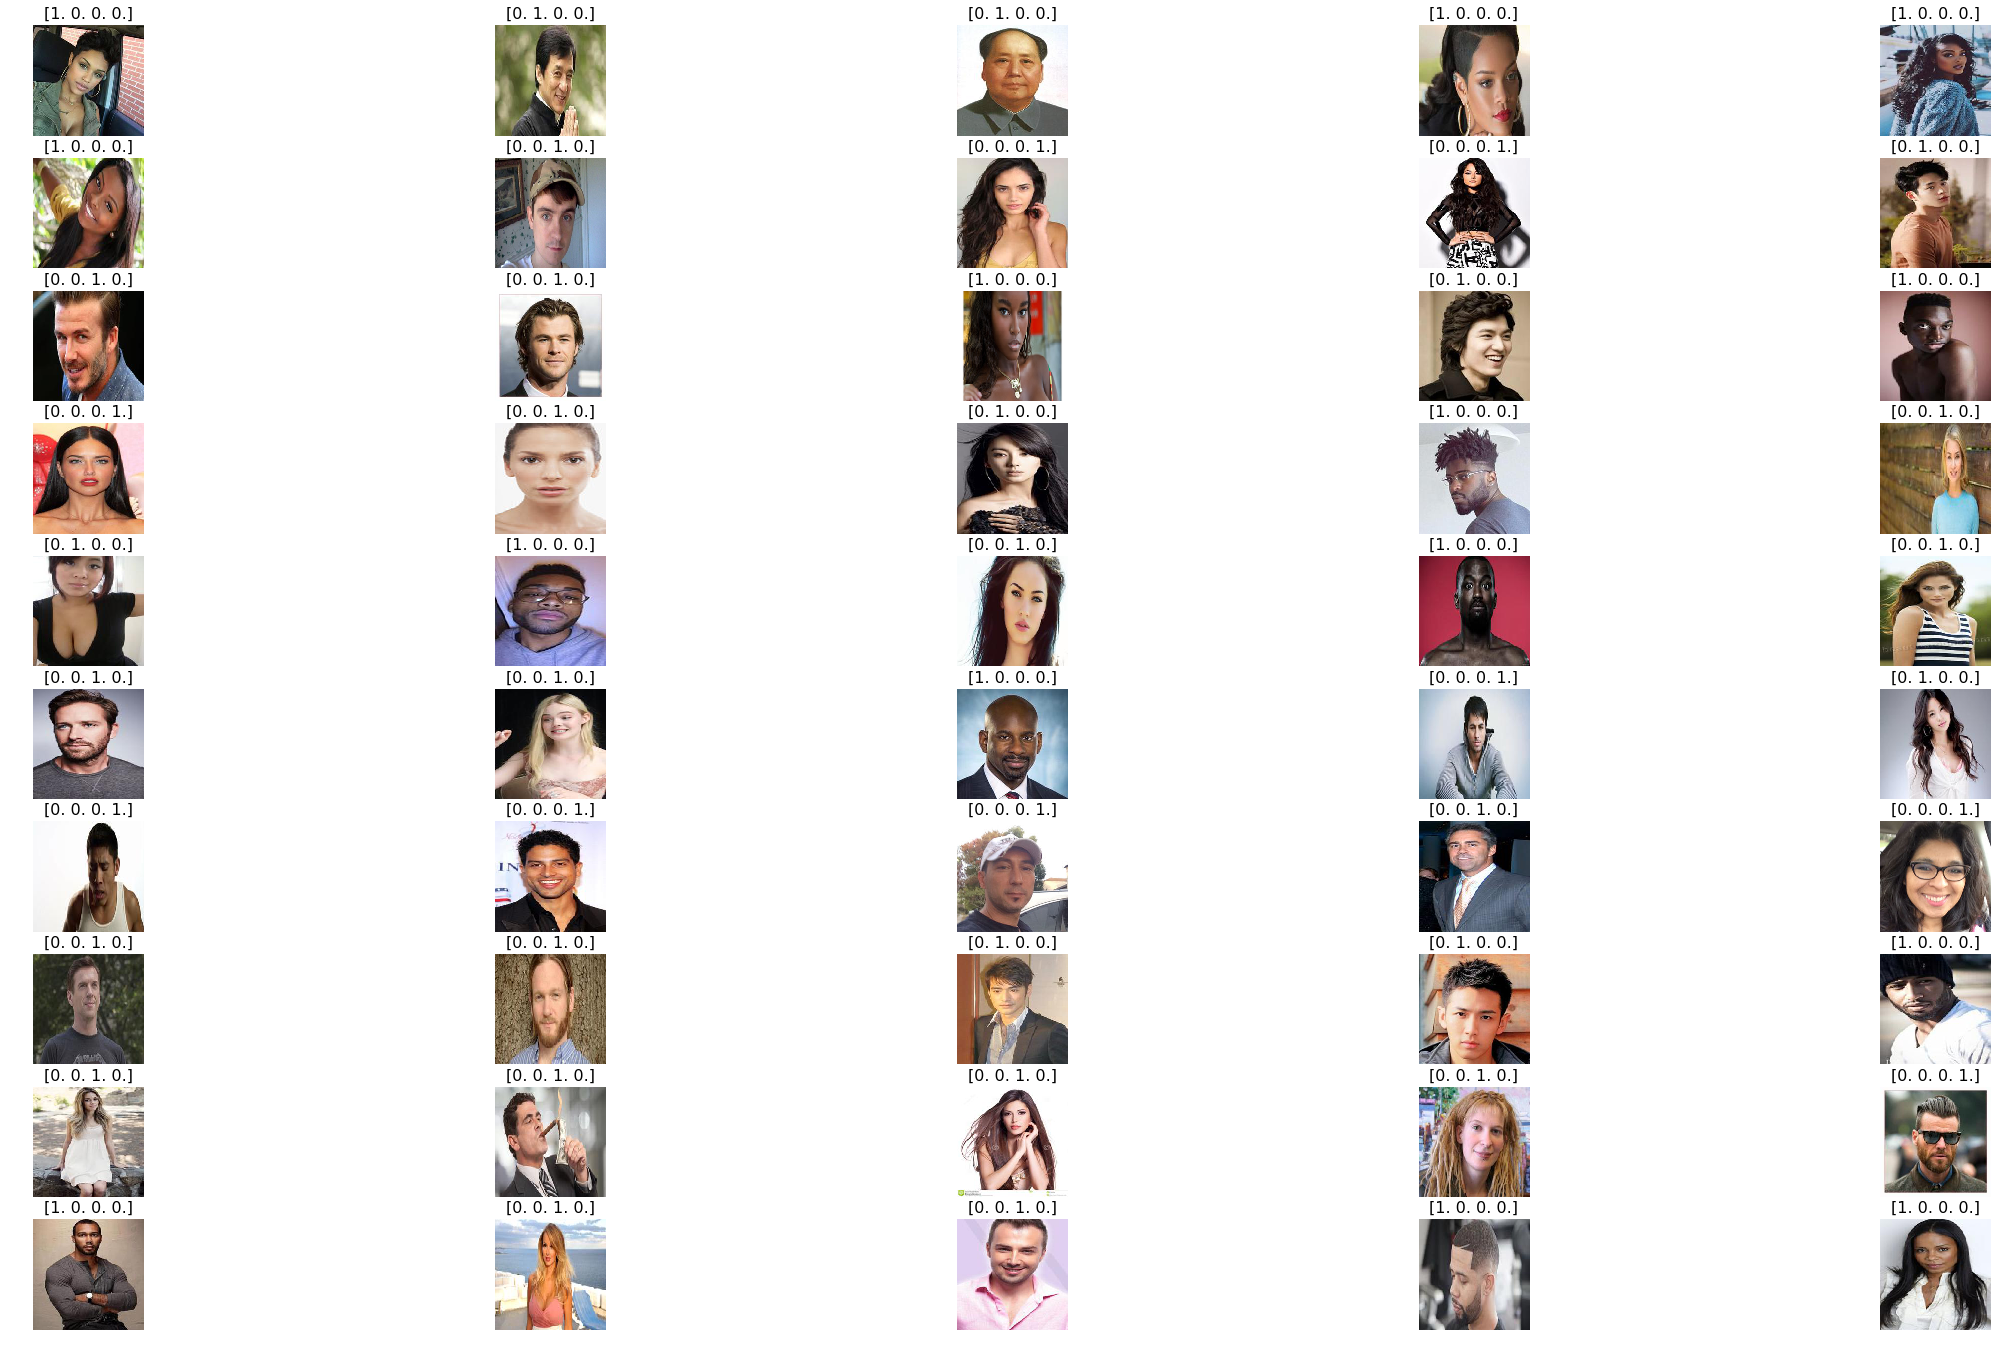

In [5]:
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

# Sequential Model Build and Training

In [6]:
model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(4, activation='softmax'),
    ])

In [7]:
model.compile(Adam(lr=.00001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model_details = model.fit_generator(train_batches, steps_per_epoch=8, 
                    validation_data=valid_batches, validation_steps=8, epochs=5, verbose=2)

Epoch 1/5


/Users/sannujsinghal/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1681981440 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Users/sannujsinghal/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7549727230 bytes but only got 0. Skipping tag 8
  " Skipping tag %s" % (size, len(data), tag))
/Users/sannujsinghal/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99877888 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag))
/Users/sannujsinghal/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 31197188 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag))
/Users/sannujsinghal/anaconda3

 - 22s - loss: 11.5149 - acc: 0.2850 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 2/5
 - 17s - loss: 12.0095 - acc: 0.2550 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 3/5
 - 17s - loss: 12.0483 - acc: 0.2525 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 4/5
 - 17s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 5/5
 - 17s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.0886 - val_acc: 0.2500


# Sequential Model Predictions

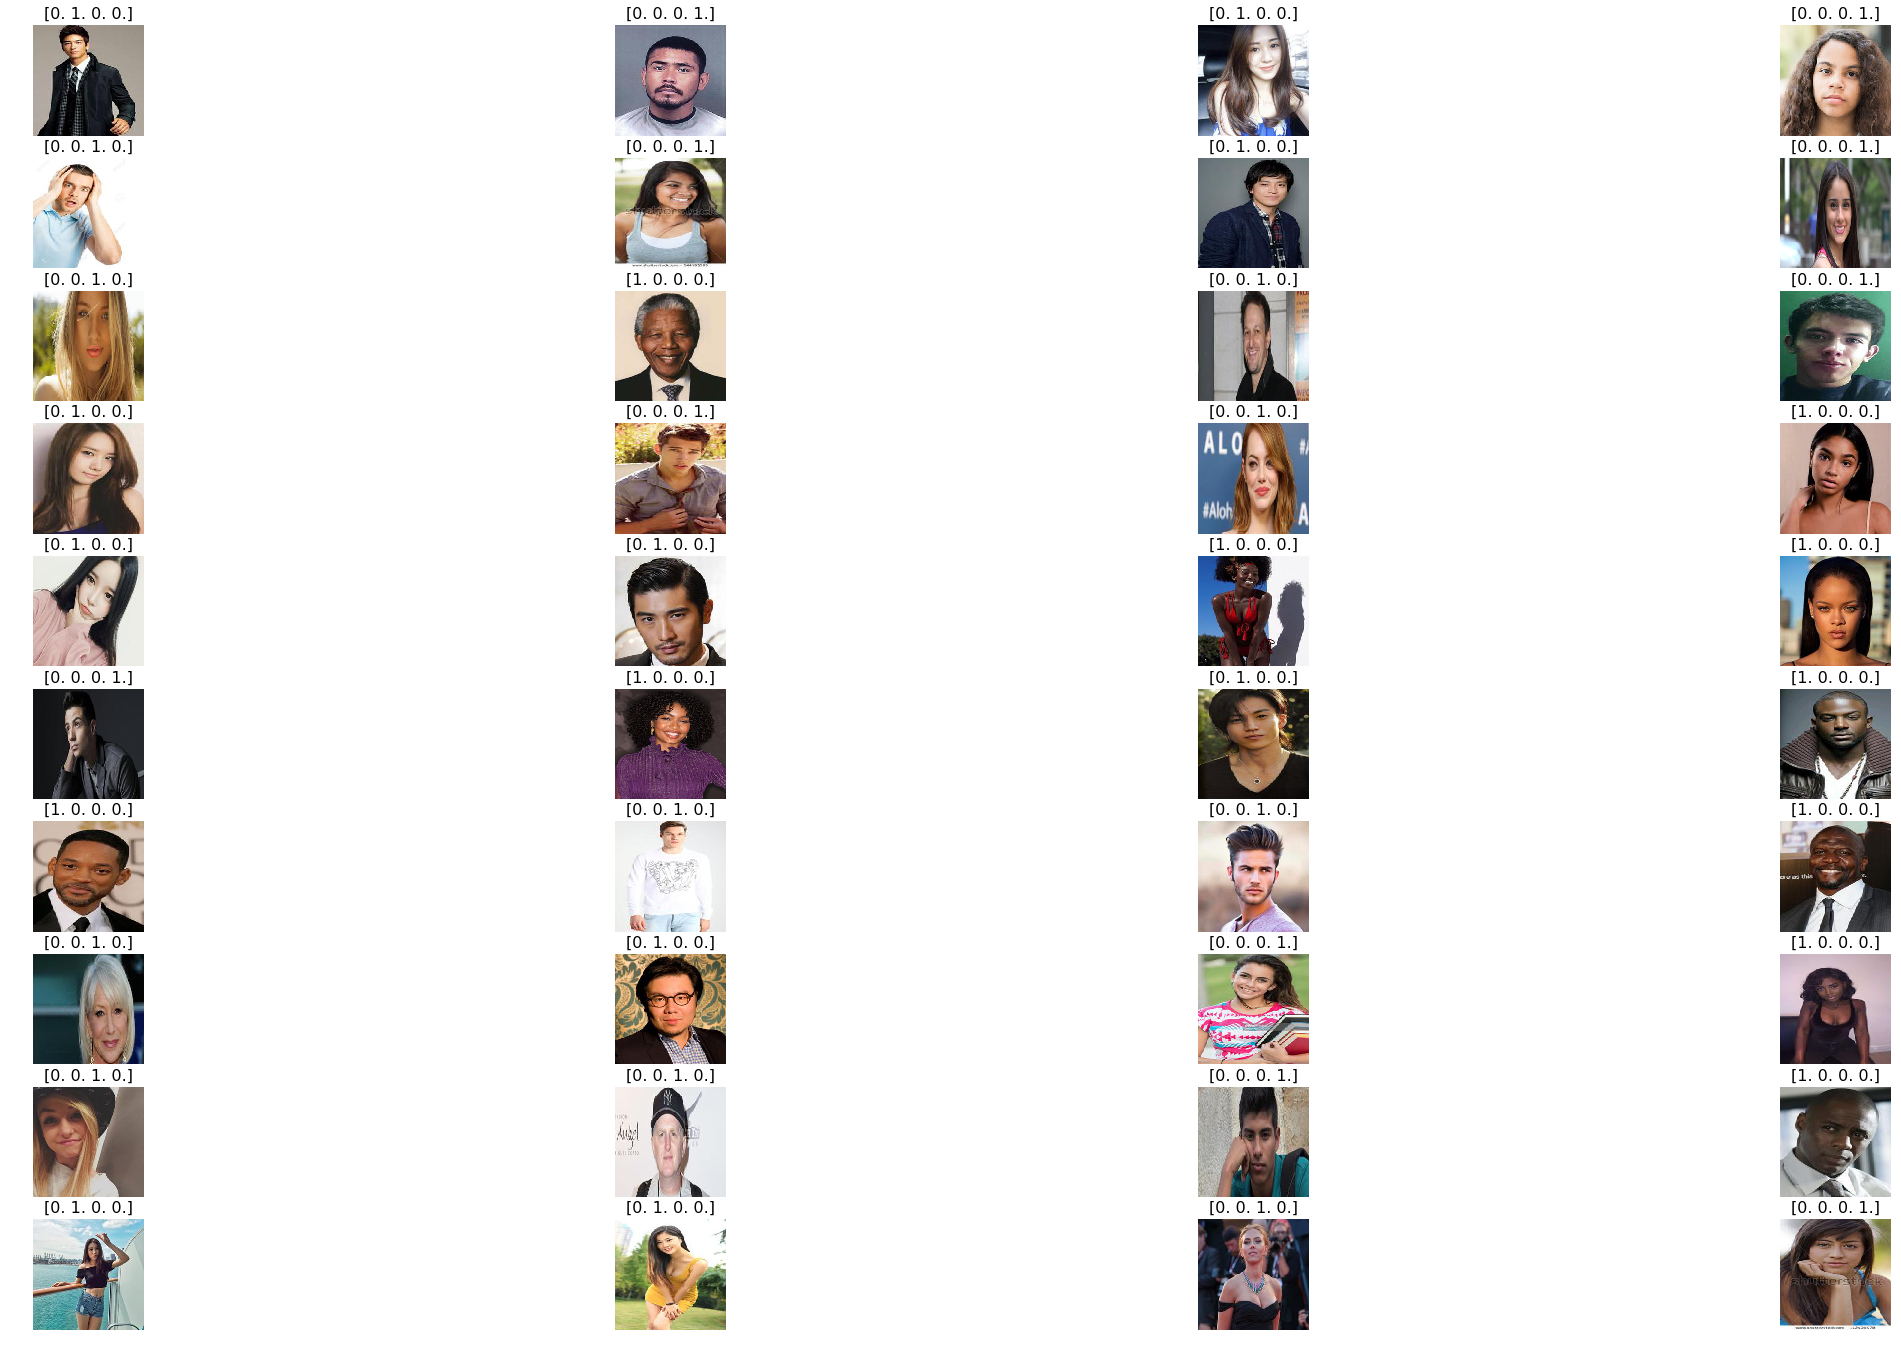

In [9]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [16]:
test_labels

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]],

In [10]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [11]:
predictions

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]],

# Sequential Model Results

In [12]:
def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    # Show the plot
    plt.show()

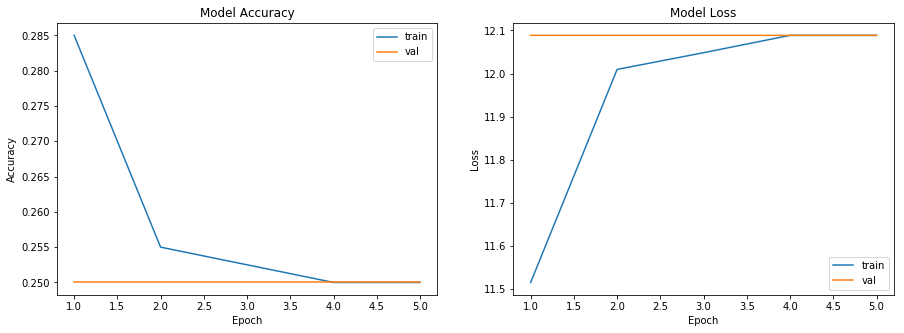

In [13]:
plot_model(model_details)

In [17]:
correctPredictions = 0

for i in range(len(predictions)):
    predArray = []
    testArray = []
    for k in range(len(predictions[i])):
        predArray.append(predictions[i][k])
        testArray.append(test_labels[i][k])
    if predArray == testArray:
        correctPredictions = correctPredictions + 1
    else:
        None

In [18]:
predictionAccuracy = correctPredictions/len(predictions)
predictionAccuracy = predictionAccuracy * 100
predictionAccuracy = np.around(predictionAccuracy, decimals=2)

print ("The sequential model had an accuracy rating of ", predictionAccuracy, "%")

The sequential model had an accuracy rating of  25.0 %


# VGG16 Model Build and Fine-tuning

In [19]:
vgg16_model = keras.applications.vgg16.VGG16()

In [20]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [21]:
type(vgg16_model)

keras.engine.training.Model

In [22]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [24]:
model.layers.pop()

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [26]:
for layer in model.layers:
    layer.trainable = False

In [27]:
model.add(Dense(4, activation='softmax'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# VGG16 Model Training

In [29]:
model.compile(Adam(lr=.00001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model_details = model.fit_generator(train_batches, steps_per_epoch=8, 
                    validation_data=valid_batches, validation_steps=8, epochs=15, verbose=2)

Epoch 1/15


/Users/sannujsinghal/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1681981440 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Users/sannujsinghal/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7549727230 bytes but only got 0. Skipping tag 8
  " Skipping tag %s" % (size, len(data), tag))
/Users/sannujsinghal/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99877888 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag))
/Users/sannujsinghal/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 31197188 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag))
/Users/sannujsinghal/anaconda3

KeyboardInterrupt: 

# VGG16 Model Predictions

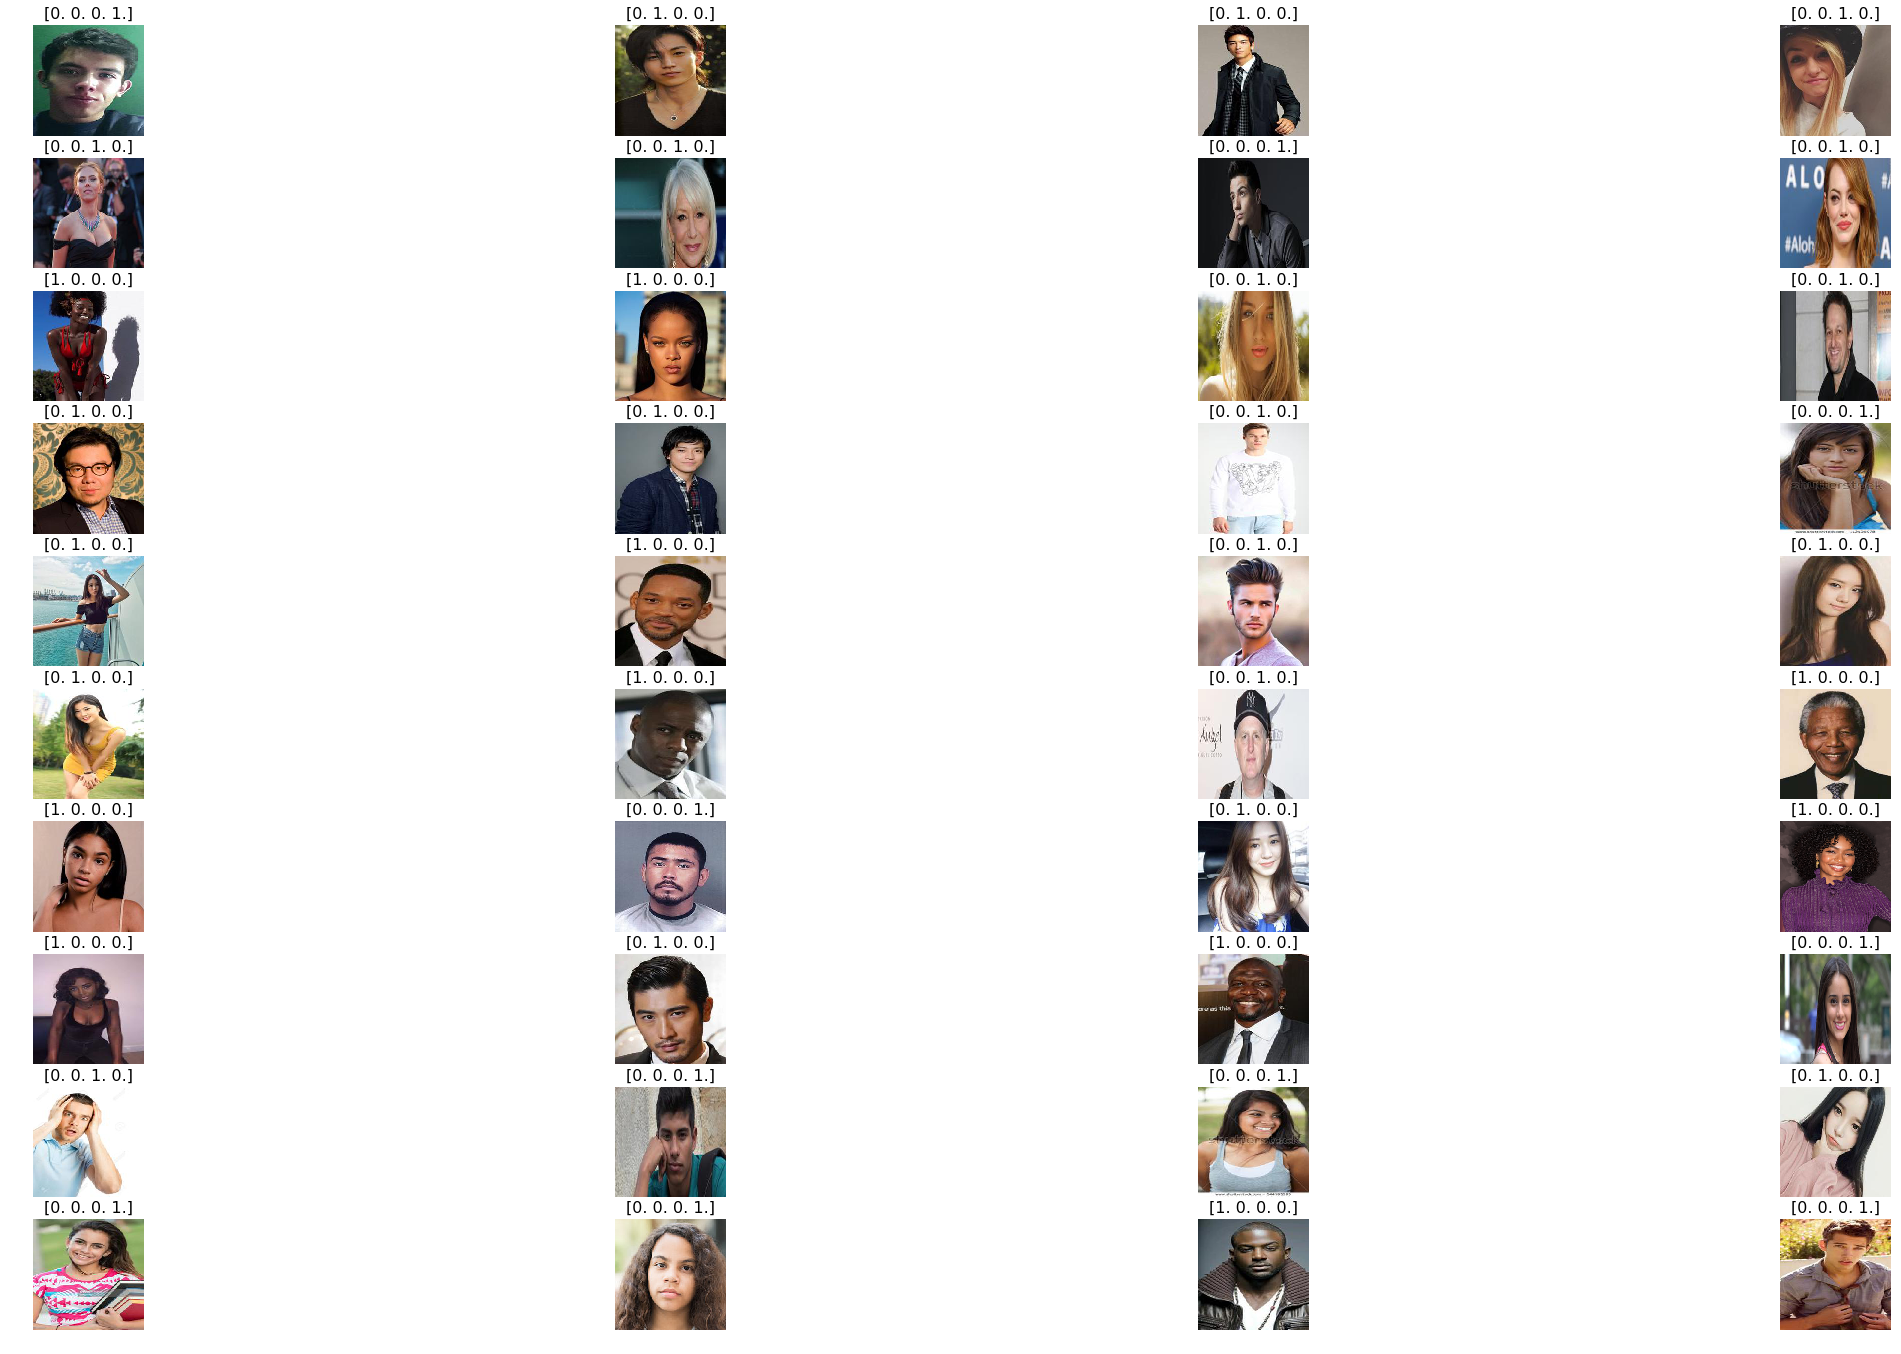

In [31]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [32]:
test_labels

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]],

In [33]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [34]:
predictions

array([[0.25769946, 0.25104687, 0.24903284, 0.2422209 ],
       [0.2584355 , 0.25076678, 0.24483873, 0.24595906],
       [0.2475402 , 0.24878107, 0.25056738, 0.25311133],
       [0.250796  , 0.25069952, 0.25284714, 0.24565738],
       [0.25270128, 0.25491637, 0.24577998, 0.24660243],
       [0.2595981 , 0.2533112 , 0.25117326, 0.23591748],
       [0.24980591, 0.25480768, 0.24691623, 0.24847013],
       [0.26186162, 0.25373593, 0.25202554, 0.23237695],
       [0.2591143 , 0.23815629, 0.25257427, 0.25015515],
       [0.2472516 , 0.2565636 , 0.24899913, 0.24718569],
       [0.25455183, 0.2522442 , 0.25168967, 0.24151434],
       [0.25118154, 0.25258127, 0.24895194, 0.24728532],
       [0.25022843, 0.25362438, 0.24829386, 0.24785325],
       [0.25412318, 0.24628444, 0.25271425, 0.24687809],
       [0.26502848, 0.2578167 , 0.23679093, 0.24036391],
       [0.24393885, 0.25850797, 0.24905746, 0.24849574],
       [0.25056717, 0.24666558, 0.2506307 , 0.25213647],
       [0.2549597 , 0.25305274,

# VGG16 Model Results

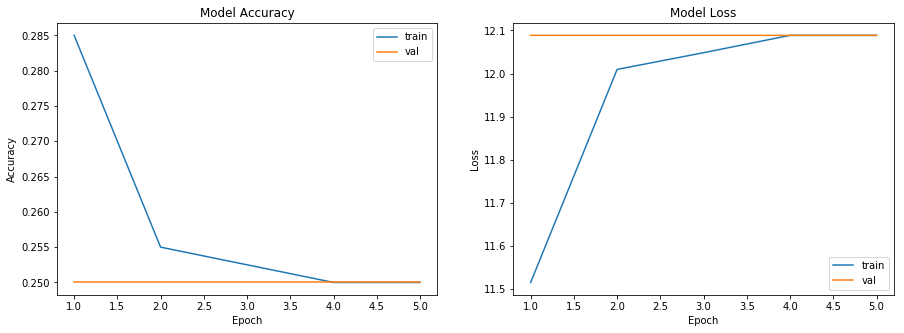

In [35]:
plot_model(model_details)

In [36]:
correctPredictions = 0

for i in range(len(predictions)):
    predArray = []
    testArray = []
    maxValPred = 0
    maxValTest = 0
    for k in range(len(predictions[i])):
        if maxValPred < predictions[i][k]:
            maxValPred = predictions[i][k]
            predArray.append(predictions[i][k])
            predArray.append(k)
        if maxValTest < test_labels[i][k]:
            maxValTest = test_labels[i][k]
            testArray.append(test_labels[i][k])
            testArray.append(k)
    if predArray == testArray:
        correctPredictions = correctPredictions + 1
    else:
        None

In [37]:
predictionAccuracy = correctPredictions/len(predictions)
predictionAccuracy = predictionAccuracy * 100
predictionAccuracy = np.around(predictionAccuracy, decimals=2)

print ("The VGG16 model had an accuracy rating of ", predictionAccuracy, "%")

The VGG16 model had an accuracy rating of  0.0 %
